## Car

In [1]:
using TrajectoryOptimization
using Plots, LinearAlgebra

┌ Info: Recompiling stale cache file /home/taylor/.julia/compiled/v1.1/TrajectoryOptimization/UVgeA.ji for TrajectoryOptimization [c79d492b-0548-5874-b488-5a62c1d9d0ca]
└ @ Base loading.jl:1184
┌ Warning: Package TrajectoryOptimization does not have MatrixCalculus in its dependencies:
│ - If you have TrajectoryOptimization checked out for development and have
│   added MatrixCalculus as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with TrajectoryOptimization
└ Loading MatrixCalculus into TrajectoryOptimization from project dependency, future warnings for TrajectoryOptimization are suppressed.


Import the car model

In [2]:
model = Dynamics.car_model
n = model.n # number of states
m = model.m; # number of controls

Define numerical type

In [3]:
T = Float64;

Define initial and goals states

In [4]:
x0 = [0.; 0.; 0.]
xf = [0.; 1.; 0.]

3-element Array{Float64,1}:
 0.0
 1.0
 0.0

Define a cost function, e.g., quadratic

In [5]:
Q = (1.0e-2)*Diagonal(I,n)
R = (1.0e-1)*Diagonal(I,m)
Qf = 1000.0*Diagonal(I,n)
cost = LQRCost(Q, R, Qf, xf);

Define a problem

In [6]:
N = 101 # number of knot points
dt = 0.1 # total time

U = [rand(m) for k = 1:N-1] 
obj = TrajectoryOptimization.Objective(cost,N) # objective with same stagewise costs

prob = Problem(model,obj, x0=x0, integration=:rk4, N=N, dt=dt)
initial_controls!(prob,U); # initialize problem with controls

Solve problem

In [7]:
solve!(prob, iLQRSolverOptions{T}(verbose=true)) # solve with iLQR

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     8242.8206159  6007.9168   0.913732  0.25      0e+00     5489.629  2.752176 0          
    2     4431.8830851  3606.19114  1.056776  0.25      0e+00     3810.938  2.360161 0          
    3     1482.5658402  3323.87932  0.887312  0.5       0e+00     2949.317  1.334793 0          
    4     470.77095824  1111.9198   0.909953  0.5       0e+00     1011.795  1.148083 0          
    5     220.75131721  353.067487  0.708136  0.5       0e+00     250.0196  0.657793 0          
    6     72.479291978  220.736924  0.671714  1         0e+00     148.272   0.538525 0          
    7     0.1730306289  72.4662535  0.997792  1         0e+00     72.30626  0.505693 0          
    8     0.0132520338  0.1

0.01022549673990532

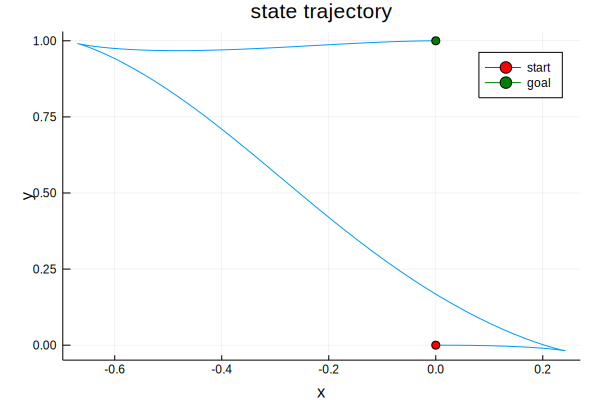

In [24]:
x = [prob.X[k][1] for k = 1:N]
y = [prob.X[k][2] for k = 1:N]

plot(x,y,xlabel="x",ylabel="y",label="",title="state trajectory")
plot!((x[1],y[1]),marker=:circle,color=:red,label="start")
plot!((x[end],y[end]),marker=:circle,color=:green,label="goal")

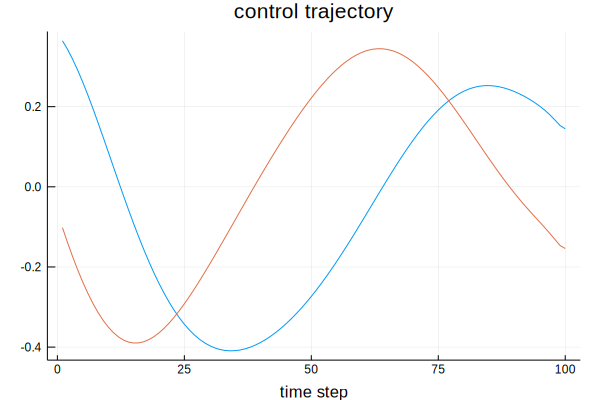

In [19]:
plot(prob.U,xlabel="time step",legend=:none,title="control trajectory")